In [1]:
from sklearn import datasets
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
work_directory = "../../combustiveis/"
dataset_name = "dataset_etanol_sp.csv"

df_original = pd.read_csv(work_directory + dataset_name, sep=",", decimal=".", encoding="cp860", index_col=False)

print("Dataset carregado. Quantidade de registros: " + str(len(df_original.index)))

Dataset carregado. Quantidade de registros: 2032002


In [3]:
df_original = df_original[["Semestre", "Valor de Venda", "Valor de Compra"]]

values = {"Valor de Venda": df_original["Valor de Venda"].median(),
          "Valor de Compra": df_original["Valor de Compra"].median()}

df_original = df_original.fillna(value=values)

In [4]:
df = df_original

In [5]:
semestres = np.unique(df["Semestre"])

anos = np.unique([x.split("-")[0] for x in semestres])

chunks = 2

separados = np.array_split(anos, chunks)

for ano in anos:
    for chunk in range(chunks):
        if ano in separados[chunk]:
            df = df.replace("^" + ano + ".*", "Período " + str(chunk), regex=True)

df = df.rename(columns={"Semestre": "Periodo"})

contadores = df["Periodo"].value_counts()

print(contadores)


Período 0    1251352
Período 1     780650
Name: Periodo, dtype: int64


<AxesSubplot:xlabel='Periodo', ylabel='count'>

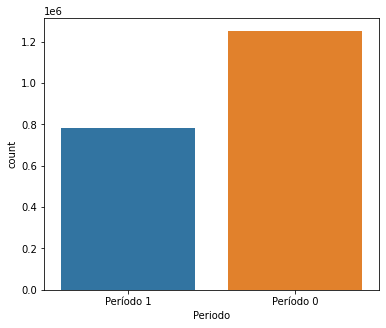

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 5))
sns.countplot(x="Periodo", data=df, ax=ax)

<AxesSubplot:xlabel='Periodo', ylabel='count'>

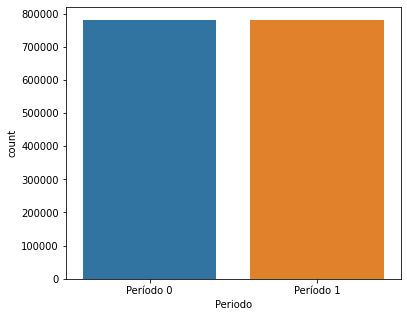

In [7]:
df_geral = pd.DataFrame()

labels = np.unique(df["Periodo"])

for label in labels:
    periodo_subset = df.loc[df["Periodo"] == label, :]
    sampled = periodo_subset.sample(780650)
    df_geral = pd.concat([df_geral, sampled], ignore_index=True)

df = df_geral

fig, ax = plt.subplots(figsize=(6, 5))
sns.countplot(x="Periodo", data=df, ax=ax)


# Realizando Regressão Logística

In [8]:
from sklearn.preprocessing import StandardScaler

# Definindo valores que serão utilizados
X = df[["Valor de Venda", "Valor de Compra"]].values
Y = df['Periodo'].values

# Scaling
sc_x = StandardScaler()
sc_y = StandardScaler()

x_std = sc_x.fit_transform(X)

# Separando dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Treinando o classificador
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

<AxesSubplot:xlabel='Predito', ylabel='Atual'>

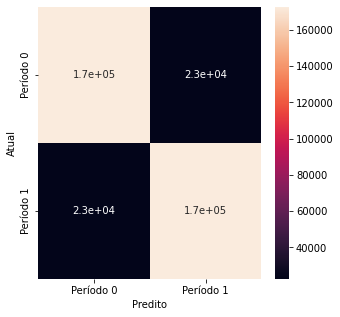

In [9]:
# Visualizando matriz de confusão
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Atual'], colnames=['Predito'])

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_matrix, annot=True, ax=ax)

In [10]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Período 0       0.88      0.88      0.88    194817
   Período 1       0.88      0.88      0.88    195508

    accuracy                           0.88    390325
   macro avg       0.88      0.88      0.88    390325
weighted avg       0.88      0.88      0.88    390325



In [11]:
logisticRegression = LogisticRegression()

logisticRegression.fit(X_train, y_train)

score = logisticRegression.score(X_test, y_test)

print("Acurácia geral: ", score)

Acurácia geral:  0.8836584897201051
